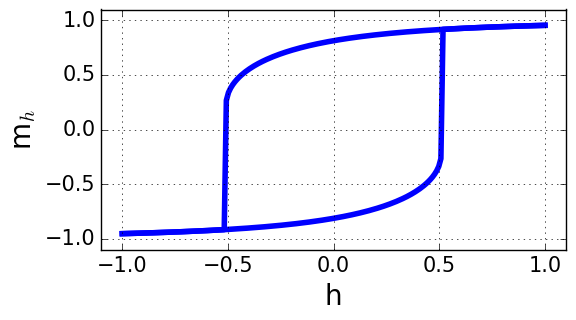

In [48]:
%matplotlib inline
from ipywidgets import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import brentq

def SW(H, theta):
    theta = theta/360.0*2.0*np.pi
    phis1=[]
    phis2=[]
    ### Top part
    for h in H: 
        F = lambda phi : 0.5*np.sin(2*(phi-theta)) + h*np.sin(phi) 
        phi = np.linspace(0, np.pi, points)
        
        phi_initial_guess = 0.8
        
        if max(F(phi)) > 0:
                p = brentq(F, 0, phi[np.argmax(F(phi))])
        else:
            p = np.pi
        phis1.append(p)
    phis1 = np.array(phis1,dtype='float')
    ### Bottom part          
    for h in H:
        F = lambda phi : 0.5*np.sin(2*(phi-theta)) + h*np.sin(phi) 
        phi = np.linspace(2*np.pi, np.pi, points)
        
        phi_initial_guess = 4.0
        if max(F(phi)) > 0:
                p = brentq(F, np.pi, phi[np.argmax(F(phi))])
        else:
            p = 0
        phis2.append(p)
    phis2 = np.array(phis2, dtype='float')
    
    for i in range(len(phis1)):
        if H[i] < 0 and np.cos(phis2[i]) > np.cos(phis1[i]):
            phis1[i] = phis2[i]
    for i in range(len(phis2)):
        if H[i] > 0 and np.cos(phis2[i]) > np.cos(phis1[i]):
            phis2[i] = phis1[i]
    return phis1, phis2
points = 200
H = np.linspace(-1.0,1.0,points)
theta0 = 45.0
def SWplt(theta):
    points = 200
    H = np.linspace(-1.0,1.0,points)
    
    phis1, phis2 = SW(H, theta)
    fig, ax = plt.subplots()
    subplots_adjust(bottom=0.3)

    l, = plot(H, np.cos(phis1), 'b', linewidth=4)
    k, = plot(H, np.cos(phis2), 'b', lw = 4)

    ax.set_ylim([-1.1,1.1])
    ax.set_xlim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel('h', fontsize=20)
    ax.set_ylabel('m'r'$_h$',fontsize=20)
    plt.grid(b=True, which='both')

stheta = FloatSlider(value=theta0, min =0.1, max = 89.9, description='Theta' )
   
interact(SWplt, theta=stheta)



